In [1]:
# The code was removed by Watson Studio for sharing.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='Datamain.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='Position_Salaries.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='Social_Network_Ads.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue', Key='kernalsvm.png')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


# df_data_1=50_Startups.csv
# df_data_2=Datamain.csv
# df_data_3=Position_Salaries.csv
# df_data_4=Salary_Data.csv
# df_data_5=Social_Network_Ads.csv

## LINEAR REGRESSION

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_4
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
#1/3rd observation will go to the test set means 10 observations
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

#feature scaling
'''from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)'''

#fitting Si￼mple Linear Regression Model into the training set
from sklearn.linear_model  import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

#predicting the test set results
y_pred=regressor.predict(X_test)

#visualize the training set result
#real data from the dataset X_train and Y_train
plt.scatter(X_train, Y_train, color='red')
#we got the correlation before so we are plotting X_train and the prediction
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary as Experience (Training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

#visualize the test set result
#real data from the dataset X_test and Y_test
plt.scatter(X_test, Y_test, color='red')
#we got the correlation before so we are plotting X_train and the prediction
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary as Experience (Test set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## MULTIPLE LINEAR REGRESSION

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_1
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,4].values

#ENCODING CATEGORICAL DATA INDEPENDENT VARIABLE
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
#3 IS THE COLOUMN NUMBER OF THE CATEGORICAL VARIABLE STATE
X[:,3]=labelencoder_x.fit_transform(X[:,3])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

#Avoiding the dummy variable trap
#remove one dummy variable coloumn
X=X[:,1:]
#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#feature scaling
'''from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)'''

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)
#predicting the test result
y_pred=regressor.predict(X_test)

#step 2:STARTING OF BACKWARD ELIMINATION:

import statsmodels.api as sm
#import statsmodels.regression.linear_model as sm1
#we have to add 1 coloumn of 1's by which the sm model come to know
#that the equation is:
#y=b0x0+b1x1+b2x2+...+bnxn
#we will add x0 coloumn to be 1 for which the equation will be:
#y=b0+b1x1+b2x2+...+bnxn which is the formula of multiple lin regression

X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
#appending 51 1 value initially in 1 coloumn that's why (50,1)
#as 1 is int so astype int and as we are adding in the first part
#so arr= np.ones... and then values=x
#so x0=1 the equation is satisfied.

#now initialise the original matrix of features
#take all lines from all of the indexes
#fit the full model with all possible predict r
x_opt=np.array(X[:,[0,1,2,3,4,5]],dtype=float)
#Ordinary Least Square OLS
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()

#step 3:CONSIDER THE PREDICTOR WITH HIGHEST P VALUE
regressor_OLS.summary()
#lower the P value more significant it is,in this case x2
x_opt=np.array(X[:,[0,1,3,4,5]],dtype=float)
#Ordinary Least Square OLS
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()
#step 3:CONSIDER THE PREDICTOR WITH HIGHEST P VALUE
regressor_OLS.summary()
#lower the P value more significant it is,in this case x2
x_opt=np.array(X[:,[0,3,4,5]],dtype=float)
#Ordinary Least Square OLS
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()

#step 3:CONSIDER THE PREDICTOR WITH HIGHEST P VALUE
regressor_OLS.summary()
#lower the P value more significant it is,in this case x2
#as we have removed two variables for backward elimination as 
#p value comes greater than significance level 0.05 now
#x1-> index 3 x2->index 4
#now remove index 4
x_opt=np.array(X[:,[0,3,5]],dtype=float)
#Ordinary Least Square OLS
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()

#step 3:CONSIDER THE PREDICTOR WITH HIGHEST P VALUE
regressor_OLS.summary()
#next remove index 5 as p value exists for that 
x_opt=np.array(X[:,[0,3]],dtype=float)
#Ordinary Least Square OLS
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()

#step 3:CONSIDER THE PREDICTOR WITH HIGHEST P VALUE
regressor_OLS.summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           3.50e-32
Time:                        14:39:21   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## POLYNOMIAL REGRESSION

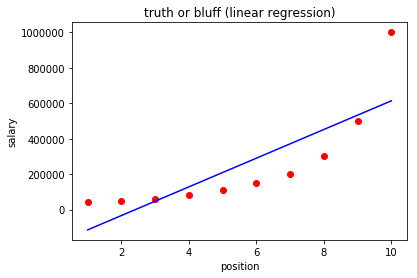

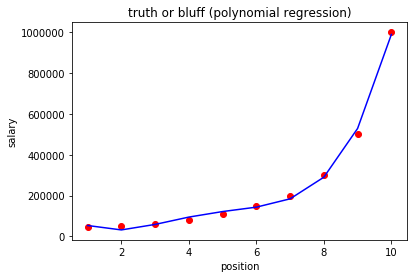

array([158862.45265153])

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_3
X=dataset.iloc[:,1:2].values#making vector as matrix by 1:2
Y=dataset.iloc[:,2].values

#splitting into training set and test set
'''from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)'''
#WE WILL NOT USE IT HERE BECAUSE THE DATASET IS TOO SMALL.
#WE WILL TEST THE WHOLE DATASET
#feature scaling
'''from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)'''

#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linreg1=LinearRegression()
linreg1.fit(X,Y)
#POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
polyreg=PolynomialFeatures(degree=4)#decrease the degree like 3 2 1 and see
x_poly=polyreg.fit_transform(X)
#better than multiple linear regression automatically adds coloumn of 1s
linreg2=LinearRegression()
linreg2.fit(x_poly,Y)
#visualize the data for linear regression
plt.scatter(X, Y,color='red')
plt.plot(X,linreg1.predict(X),color='blue')
plt.title("truth or bluff (linear regression)")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

#visualize the data for polynomial regression
#adding x_grid for more accurate graph 
#x_grid=np.arange(min(X),max(X),0.1)
#x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(X, Y,color='red')
#plt.plot(x_grid,linreg2.predict(polyreg.fit_transform(x_grid)),color='blue')
plt.plot(X,linreg2.predict(polyreg.fit_transform(X)),color='blue')
plt.title("truth or bluff (polynomial regression)")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

#taking individual value as this is a 2 d array so try by [[]] 
linreg1.predict([[6.5]])
linreg2.predict(polyreg.fit_transform([[6.5]]))

# SUPPORT VECTOR REGRESSION(SVR)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversion

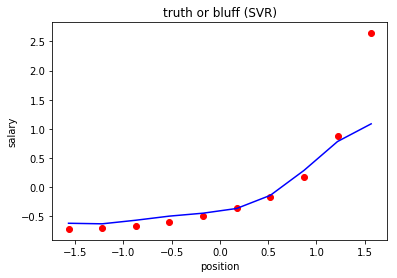

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_3
X=dataset.iloc[:,1:2].values#making vector as matrix by 1:2
Y=dataset.iloc[:,2].values

#splitting into training set and test set
'''from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)'''
#WE WILL NOT USE IT HERE BECAUSE THE DATASET IS TOO SMALL.
#WE WILL TEST THE WHOLE DATASET
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
X=sc_x.fit_transform(X)
sc_y=StandardScaler()
Y=sc_y.fit_transform(Y)

#REGRESSION MODEL
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')#taking gaussian kernel
regressor.fit(X,Y)


#taking individual value as this is a 2 d array so try by [[]] 

y_pred=sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
#see the formula of SVR where alpha(vector)=k^-1(k inverse)*y (vector)
#we have to inverse sc_y because we are predicting y_prediction.
#next line is same with the previous line just shorter,dont need np.array
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))
#visualize the data for SVR
plt.scatter(X, Y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("truth or bluff (SVR)")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

# DECISION TREE REGRESSOR

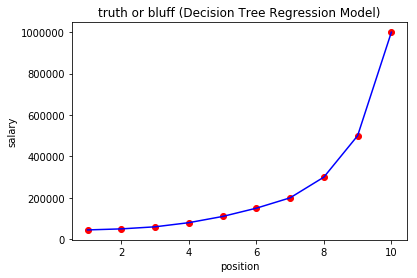

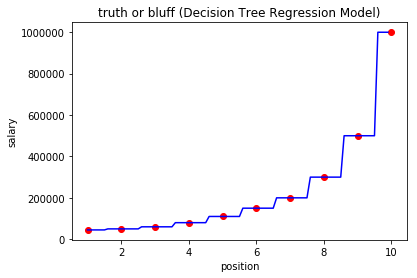

'decision tree for one variable independent variable adds the test set data \nwith just a straight line and that is why if you see the plot u will\nsee that the model is nonlinear and non continious.to see this please\ncheck it by incresing the resolution using x_grid'

In [11]:
#REGRESSION TEMPLATEimport numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_3
X=dataset.iloc[:,1:2].values#making vector as matrix by 1:2
Y=dataset.iloc[:,2].values

#splitting into training set and test set
'''from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)'''

#feature scaling
'''from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)'''

#REGRESSION MODEL
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)#default is mse mean squared error
#default of splitter is "best"
regressor.fit(X,Y)



#taking individual value as this is a 2 d array so try by [[]] 

regressor.predict([[6.5]])

#visualize the data for Decision Tree Regression
plt.scatter(X, Y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("truth or bluff (Decision Tree Regression Model)")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

#visualize the data for Decision Treee Regression for higher resolution
#adding x_grid for more accurate graph 
x_grid=np.arange(min(X),max(X),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(X, Y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title("truth or bluff (Decision Tree Regression Model)")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

'''decision tree for one variable independent variable adds the test set data 
with just a straight line and that is why if you see the plot u will
see that the model is nonlinear and non continious.to see this please
check it by incresing the resolution using x_grid'''

# RANDOM FOREST REGRESSION

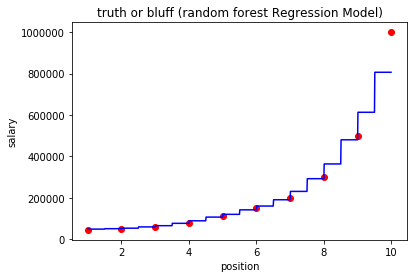

In [12]:
#REGRESSION TEMPLATEimport numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_3
X=dataset.iloc[:,1:2].values#making vector as matrix by 1:2
Y=dataset.iloc[:,2].values

#splitting into training set and test set
'''from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)'''
#WE WILL NOT USE IT HERE BECAUSE THE DATASET IS TOO SMALL.
#WE WILL TEST THE WHOLE DATASET
#feature scaling
'''from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)'''

#random forest REGRESSION MODEL
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
#criterion is default
regressor.fit(X,Y)




#taking individual value as this is a 2 d array so try by [[]] 

regressor.predict([[6.5]])

#visualize the data for random forest regression for higher resolution
#adding x_grid for more accurate graph 
x_grid=np.arange(min(X),max(X),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(X, Y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title("truth or bluff (random forest Regression Model)")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

# CLASSIFICATION ALGORITHM

## LOGISTIC REGRESSION

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will 

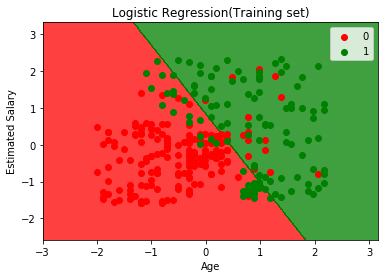

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


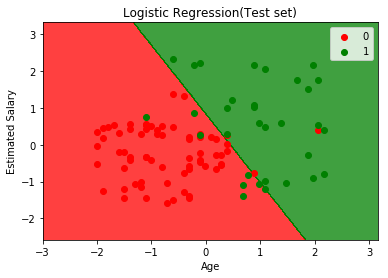

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Logistic Regression for the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

## K NEAREST NEIGHBOUR(KNN)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric R

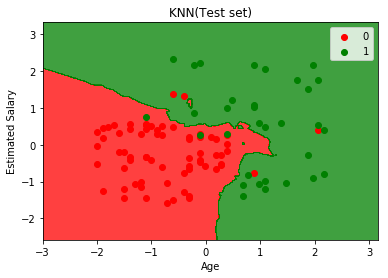

In [14]:
#knn algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#knn classifier
'''we care about metric and P because as Curiel explains
that K in an algorithm is based on Euclidean distance and 
we want to choose Actually the Euclidean distance as a distance based 
for our algorithm and to choose the Euclidean distance as you can see
we need to first pick the minKowski metric.And then here we need to 
choose p equals 2 because as you can see power parameter for the 
Minkowski metrics.That means that when we select the Minkowski metric 
then when people's one this is equivalent to using Manhattan distance
but that's not the distance we want we want the Euclidean distance 
and actually the parameter for this is picos too.So what we will just
need to do is just add those two parameters metric metric equals 
Minkowski and close too.So let's do this let's add here metric equals
mine Koski and p equals to and that sets the classify'''
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 64 and 29 are the correct prediction and 4 and 3 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result
 

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('KNN(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

## SUPPORT VECTOR MACHINE ALGORITHM

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric R

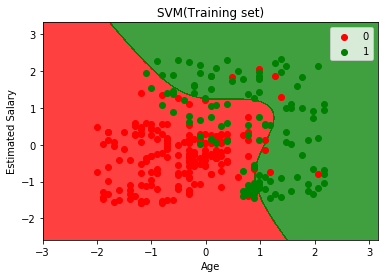

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


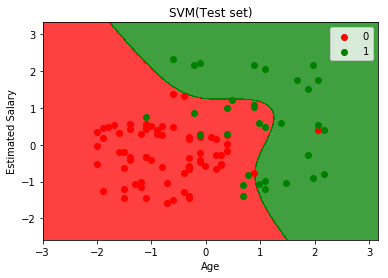

In [15]:
#SVM ALGORITHM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
#degree is for polynomial kernel gamma is for rbf poly or sigmoid

#APPLY VARIOUS KERNEL TO SEE THE MODIFIED RESULTS.

#LINEAR KERNEL
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)


#POLYNOMIAL KERNEL not better than LINEAR kernel for this dataset
from sklearn.svm import SVC
classifier=SVC(kernel='poly',degree=3,random_state=0)
classifier.fit(X_train,Y_train)

# SIGMOID KERNEL not better than LINEAR kernel for this dataset
'''from sklearn.svm import SVC
classifier=SVC(kernel='sigmoid',gamma='scale',random_state=0)
classifier.fit(X_train,Y_train)
'''
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

## KERNAL SVM

In [16]:
streaming_body_1

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric R

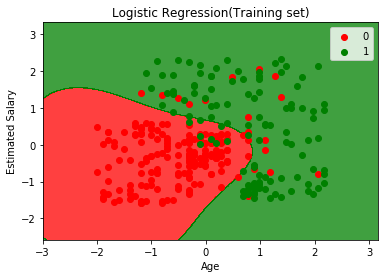

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


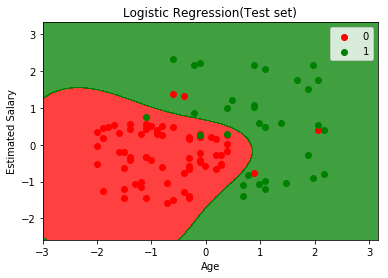

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)#gaussian kernel radial basis function
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

## NAIVE BAYES

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric R

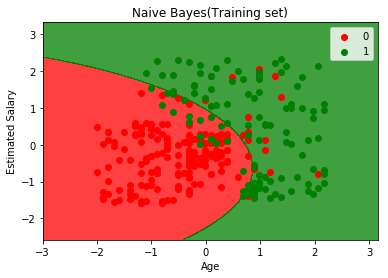

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


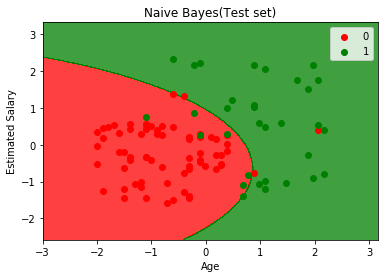

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Bayes(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Bayes(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 

# DECISION TREE

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric R

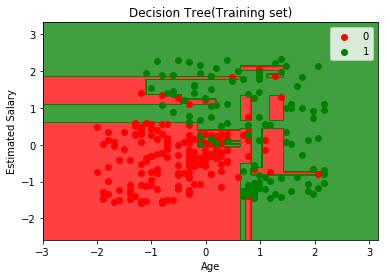

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


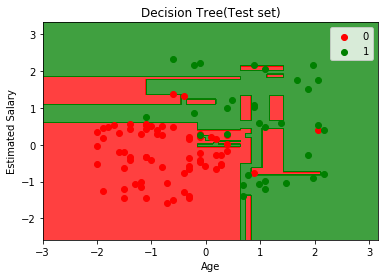

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# RANDOM FOREST 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric R

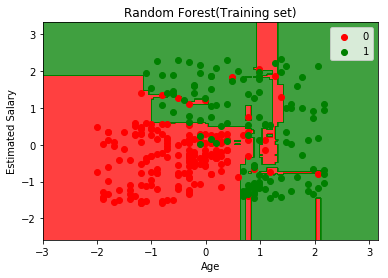

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


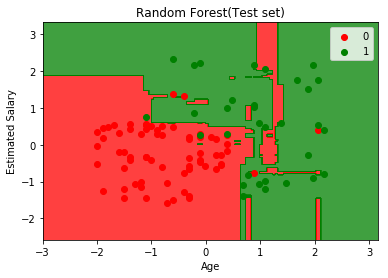

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_5
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [24]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='50_Startups.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_6 = pd.read_csv(body)
df_data_6.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# df_data_6=Mall_Customers.csv

# K MEANS CLUSTERING

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_6
X=dataset.iloc[:,[3,4]].values

#ELBOW METHOD
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#Applying K Means 
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

#Visulazing the Clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='average income average expenditure')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='low income excess expenditure')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='high income high expenditure')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='low income low expenditure')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='high income low expenditure')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('cluster of Clients')
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending score(1-100')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'California'

# HIERERCHICAL CLUSTERING

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=df_data_6
X=dataset.iloc[:,[3,4]].values

#USING DENDROGRAM
#ward method used to minimize the variance
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distances')
plt.show()

''' In dendrogram we will track the largest line where no horizontal
line is parralel and when we get the horizontal line we just count
the parallel line from the top 
here it will be 5'''

#Fitting Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

#visualizing the Clusters
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='high income low expenditure')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='average income average expenditure')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='high income high expenditure')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='low income high expenditure')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='low income low expenditure')

plt.title('cluster of Clients')
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending score(1-100')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'New York'

In [29]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='Market_Basket_Optimisation.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_7 = pd.read_csv(body)
df_data_7.head()


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# df_data_7=Market_Basket_Optimisation.csv

In [30]:
# The code was removed by Watson Studio for sharing.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset=df_data_7
#making the total transactions as list
transactions=[]
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

#Train Apriori Model in The dataset
'''Product purchased 3 times a day and 7 days so 3*7=21 product 
purchased and the support will be 21/(total no of transactions)=
21/7500=0.0028~0.003  
we have set the min_confidence as less as we can give
now min_lift ,we set it to 3'''
from apyori import apriori
rules=apriori(transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2)

#Visualizing the result
results=list(rules)

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset=df_data_7
transactions=[]
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

#NO SKLEARN PACKAGE TO IMPLEMENT ECLAT
#THAT IS WHY WE WILL USE mlxtend

#Encoding the data
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df_x=pd.DataFrame(te_ary,columns=te.columns_)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df_sets=apriori(df_x,min_support=0.003,use_colnames=True)
df_rules=association_rules(df_sets,metric='support',min_threshold=0.003,support_only=True)

In [34]:

body = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue',Key='Ads_CTR_Optimisation.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_8 = pd.read_csv(body)
df_data_8.head()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# df_data_8=Ads_CTR_Optimisation.csv

# REINFORCEMENT LEARNING : RANDOM SELECTION ALGORITHM

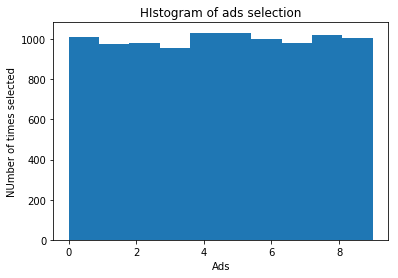

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=df_data_8

#implementing random selection
import random
total_users=10000
no_ads=10
ads_selected=[]
total_reward=0
for i in range(0,total_users):
    ad=random.randrange(no_ads)
    ads_selected.append(ad)
    reward=dataset.values[i,ad]
    total_reward=total_reward+reward
    
#Visualizing
plt.hist(ads_selected)
plt.title('HIstogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('NUmber of times selected')
plt.show()

# UPPER CONFIDENCE BOUND

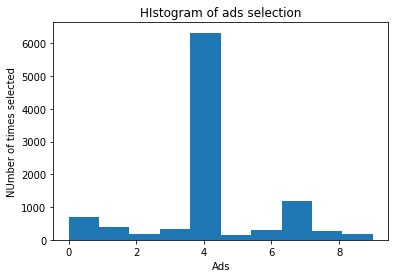

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Randomly selected ads have got the total_reward 1224 this time
#as you select it will be near 1200 almost.
#implement Ucb to maximise the total rewards

#importing the dataset
dataset=df_data_8

#Implementing UCB
import math
total_users=10000
no_ads=10
ads_selected=[]
number_selections=[0]*no_ads
sums_rewards=[0]*no_ads
total_reward=0
for n in range(0,total_users):
    ad=0
    max_upper_bound=0
    for i in range(0,no_ads):
        if(number_selections[i]>0):
            average_reward=sums_rewards[i]/number_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/number_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    number_selections[ad]=number_selections[ad]+1
    reward=dataset.values[n,ad]
    sums_rewards[ad]=sums_rewards[ad]+reward
    total_reward=total_reward+reward
    
plt.hist(ads_selected)
plt.title('HIstogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('NUmber of times selected')
plt.show()

# THOMPSON SAMPLING

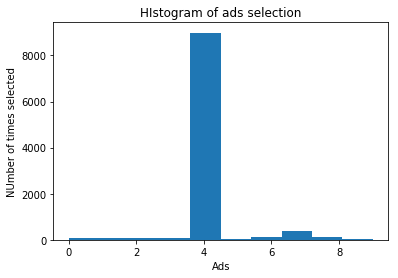

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Randomly selected ads have got the total_reward 1224 this time
#as you select it will be near 1200 almost.
#implement Ucb to maximise the total rewards

#importing the dataset
dataset=df_data_8

#Implementing THOMPSON SAMPLING
import math
import random
total_users=10000
no_ads=10
ads_selected=[]
number_reward_1=[0]*no_ads
number_reward_0=[0]*no_ads
total_reward=0
for n in range(0,total_users):
    ad=0
    max_random=0
    for i in range(0,no_ads): 
        random_beta=random.betavariate(number_reward_1[i]+1,number_reward_0[i]+1)
        
        if random_beta>max_random:
            max_random=random_beta
            ad=i
      
    ads_selected.append(ad)
    reward=dataset.values[n,ad]
    if reward==1:
       number_reward_1[ad]=number_reward_1[ad]+1
    else:
        number_reward_0[ad]=number_reward_0[ad]+1
    total_reward=total_reward+reward
    
plt.hist(ads_selected)
plt.title('HIstogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('NUmber of times selected')
plt.show()

In [41]:
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_3 = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue', Key='Restaurant_Reviews.tsv')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_3, "__iter__"): streaming_body_3.__iter__ = types.MethodType( __iter__, streaming_body_3 ) 


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#IMPORTING THE DATASET

# this will no work dataset=pd.read_csv("Restaurant_Reviews.tsv")
#because this is not comma separated value (csv)
#this is tab seperated value(tsv)

#so use delimiter '\t' and quote=3 will also avoid double quote
dataset=streaming_body_3

#Cleaning The text like steamming
import re
import nltk
#download stopwords which is a package inside nltk for nlp
#stopwords contains a list of irrelevant words that is meaningless for 
#the review process like here for the first line 'this'

nltk.download('stopwords')  
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#dataset['Review'][0]='Wow... LOved this place.'
'''1st step Only keep the letters into the review.So we will remove all the 
letters and numbers and punctutations etc.'''

#We want to do this for alllll data
#actually corpus in NLP is collection of some texts
corpus=[]
#Write what you dont want to remove what ,we will write inside the ''.
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    #lower case
    review=review.lower()
    #get rid of the irrelevant words
    review=review.split()
    #Creating stem object
    ps=PorterStemmer()
    '''go to every word in the review list and then check if it is not 
    included in the stopwords(english) list'''
    #review=[word for word in review if not word in (stopwords.words('english'))]

    #STEMMING
    #It will be applied on each word so the review will be:
    review=[ps.stem(word) for word in review if not word in (stopwords.words('english'))]
    #We want to join the elements of that review list by ' '.
    review=' '.join(review)
    #add one by one in the corpus list
    corpus.append(review)
#TEXT CLEANING DONE!!!
 
#Creating the BAG OF WORDS Model
'''Defining a sparse matrix where the dependent variable will be there and it will
be used to train the model in the classification after Bag or Words'''
from sklearn.feature_extraction.text import CountVectorizer
#why 1500 because see the X we have 1565 words and so we are taking 1500 frequent words
cv=CountVectorizer(max_features=1500)
'''here in countvectorizer we can also include stopwords,token[^a-zA-Z] and lowercase
maxfeature also'''
X=cv.fit_transform(corpus).toarray()

#BAG OF WORDS MODEL DONE!!!!
#take dependent variable or the review in the Y
Y=dataset.iloc[:,1].values

#NAIVE BAYES CLASSIFICATION MODEL OUR DATA IS READY

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

#WE DON'T NEED FEATURE SCALING
#Fitting the classification for the training set
#create your classifier
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TypeError: 'StreamingBody' object is not subscriptable

In [19]:
# The code was removed by Watson Studio for sharing.

In [20]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_f27aa397d2f540dba103ff3d924b337f.get_object(Bucket='datasciencdibm-donotdelete-pr-xumhboof88saue', Key='PetImages.zip')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 
